In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [2]:
breast_cancer_data = load_breast_cancer()

In [3]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
len(breast_cancer_data.data)

569

In [5]:
len(breast_cancer_data.target)

569

In [6]:
#split data into test and train sets. set random state aka shuffles to 200
x_train, x_test, y_train, y_test = train_test_split(breast_cancer_data.data, 
                                                    breast_cancer_data.target, 
                                                    test_size=0.25, 
                                                    random_state=200)

In [7]:
model = LogisticRegression(max_iter=6000) #received an error of failed to converge without setting max iterations, meaning the model did not get close to a desired result

In [55]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=6000)

In [56]:
model.predict(x_test[0:10])

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [57]:
predictions = model.predict(x_test)

In [58]:
predictions

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [60]:
print(predictions)
print(y_test)

[0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0]
[1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0]


In [70]:
# Use score method to get accuracy of model
score = model.score(x_test, y_test)
print(score)

0.9090909090909091


In [69]:
print(x_test)

[[1.434e+01 1.347e+01 9.251e+01 ... 1.087e-01 3.062e-01 6.072e-02]
 [1.460e+01 2.329e+01 9.397e+01 ... 1.359e-01 2.477e-01 6.836e-02]
 [1.005e+01 1.753e+01 6.441e+01 ... 6.499e-02 2.894e-01 7.664e-02]
 ...
 [1.227e+01 2.997e+01 7.742e+01 ... 0.000e+00 2.409e-01 6.743e-02]
 [1.866e+01 1.712e+01 1.214e+02 ... 1.674e-01 2.894e-01 8.456e-02]
 [1.468e+01 2.013e+01 9.474e+01 ... 1.609e-01 3.029e-01 8.216e-02]]


In [77]:
print("Accuracy Score is:", accuracy_score(y_test, predictions))

print("Recall Score is:", recall_score(y_test, predictions))

print("Precision Score is:", precision_score(y_test, predictions))

print("f1 Score is:", f1_score(y_test, predictions))

Accuracy Score is: 0.9090909090909091
Recall Score is: 0.9489795918367347
Precision Score is: 0.9207920792079208
f1 Score is: 0.934673366834171


In [80]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  8]
 [ 5 93]]


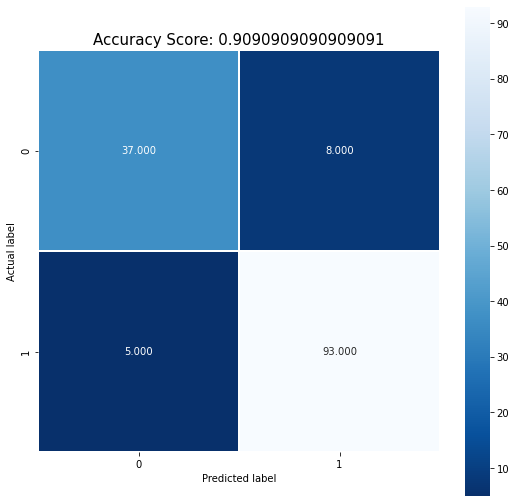

In [81]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [61]:
# Assign and update coefficients
coefficients = model.coef_
coefficients = coefficients.tolist()[0]

In [88]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [83]:
len(coefficients)

30

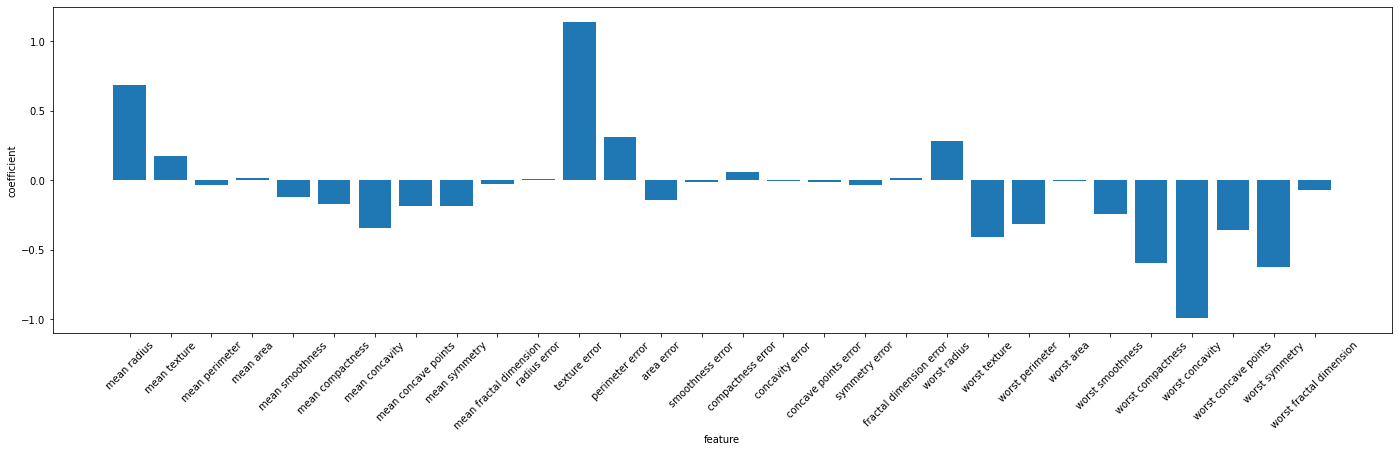

In [104]:
plt.figure(figsize=(24,6))
ax=plt.subplot()
plt.bar(list(range(1,31)),coefficients)
plt.xticks(list(range(1,31)), rotation=45)
ax.set_xticklabels(breast_cancer_data.feature_names)
plt.xlabel('feature')
plt.ylabel('coefficient')
 
plt.show()

In [141]:
#two ways to use a for loop to find indices of misclassified/mispredicted labels
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1 # some otherwise very useful code on towardsdatascience had this misindented underneath the if statement which was inaccurate 

In [142]:
misclassifiedIndexes

[0, 1, 7, 10, 22, 23, 27, 42, 82, 85, 89, 99, 111]

In [137]:
#another way of doing the same thing above
misclassifiedIndexes = []
for i in range(len(y_test)):
    if y_test[i] != predictions[i]:
        misclassifiedIndexes.append(i)
    else:
        pass

In [138]:
misclassifiedIndexes

[0, 1, 7, 10, 22, 23, 27, 42, 82, 85, 89, 99, 111]

In [151]:
rows = []
for i, badIndex in enumerate(misclassifiedIndexes):
    print('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]))
    rows.append([predictions[badIndex], y_test[badIndex], x_test[badIndex]])
    
df = pd.DataFrame(rows, columns=["Prediction Class", "Actual Class", "Test Features"])

Predicted: 0, Actual: 1
Predicted: 1, Actual: 0
Predicted: 0, Actual: 1
Predicted: 1, Actual: 0
Predicted: 0, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 0
Predicted: 1, Actual: 0
Predicted: 0, Actual: 1
Predicted: 1, Actual: 0
Predicted: 1, Actual: 0
Predicted: 1, Actual: 0
Predicted: 0, Actual: 1


In [152]:
df

,Prediction Class,Actual Class,Test Features
0,0,1,"[14.34, 13.47, 92.51, 641.2, 0.09906, 0.07624,..."
1,1,0,"[14.6, 23.29, 93.97, 664.7, 0.08682, 0.06636, ..."
2,0,1,"[13.24, 20.13, 86.87, 542.9, 0.08284, 0.1223, ..."
3,1,0,"[13.86, 16.93, 90.96, 578.9, 0.1026, 0.1517, 0..."
4,0,1,"[17.85, 13.23, 114.6, 992.1, 0.07838, 0.06217,..."
5,1,0,"[13.48, 20.82, 88.4, 559.2, 0.1016, 0.1255, 0...."
6,1,0,"[14.27, 22.55, 93.77, 629.8, 0.1038, 0.1154, 0..."
7,1,0,"[15.85, 23.95, 103.7, 782.7, 0.08401, 0.1002, ..."
8,0,1,"[16.84, 19.46, 108.4, 880.2, 0.07445, 0.07223,..."
9,1,0,"[13.44, 21.58, 86.18, 563.0, 0.08162, 0.06031,..."
